# Homework 7
### ASTR-324, Spring 2017, Ivezic & Juric, University of Washington
https://github.com/uw-astr-324-s17/astr-324-s17


## Problem

Using SDSS SkyServer/CasJobs to query and download subsets of data sets.

Log on to SDSS CasJobs interface by following the link for 'CasJobs' that appear once you're logged into SkyServer, at http://skyserver.sdss.org. Then:

1. Write a query that selects Galactic latitude and longitude, and the "de-reddened" $g$ and $r$ band magnitudes of stars (from table `Star`) in a 1-degree radius circle around two directions in the sky:

$$ {\rm Field\, A}: \alpha = 341.6^\circ, \delta = 31.7^\circ $$
$$ {\rm Field\, B}: \alpha = 115.2^\circ, \delta = 32.7^\circ $$

Consult the [Schema Browser](https://skyserver.sdss.org/CasJobs/SchemaBrowser.aspx) to find the apropriate column names. Have the query store these into two MyDB tables, `fieldA` and `fieldB`.

2. Download these tables as CSV (comma separated value) files.

3. Use Python APIs of your choice (e.g., `numpy`, `Pandas`, or some other) to load these files in a Python notebook. Note that functions for loading CSV data already exist in nearly all of these APIs; don't write your own parser!

4. Make a side-by-side $(ra, dec)$ plot for the two fields, to show the selected data truly spans only a 2-degree diameter circle.

5. Make side-by-side color-magnitude diagrams (CMDs), with $g-r$ on the `x` axis, and $g$ on the `y` axis. Set the plot limits to show only values $-0.5 < g-r < 2$ and $14 < g < 22$ (note: use the "astronomer's convention" for the $y$ axis, i.e., flip it). The diagrams could either be scatter or density plots; choose what you feel is best to bring out any interesting features and/or differences.

6. Comment on any similarities and differences you find in the plots created above.

## Solution

The two queries:

<table>
  <tbody>
    <tr>
    <th>Field A</th>
    <th>Field B</th>
    </tr>

<tr>
    <td>
```
SELECT
  s.l, s.b,
  s.dered_g as g, s.dered_r as r,
  s.err_g, s.err_r,
  s.flags
  
FROM
  dbo.fGetNearbyObjEq(115.2, 32.7, 60) AS n
  
JOIN
  Star AS s ON n.objID = s.objID
  
INTO
  mydb.fieldB
```
</td>
<td>
Field B:
```
SELECT
  s.l, s.b,
  s.dered_g as g, s.dered_r as r,
  s.err_g, s.err_r,
  s.flags
  
FROM
  dbo.fGetNearbyObjEq(115.2, 32.7, 60) AS n
  
JOIN
  Star AS s ON n.objID = s.objID
  
INTO
  mydb.fieldB
```
</td>
    </tr>
  </tbody>
</table>


and then I download these outputs into `fieldA_mjuric.csv` and `fieldB_mjuric.csv`.

Processing and display:

In [1]:
import pandas as pd
fieldA = pd.read_csv('data/fieldA_mjuric.csv')
fieldB = pd.read_csv('data/fieldB_mjuric.csv')

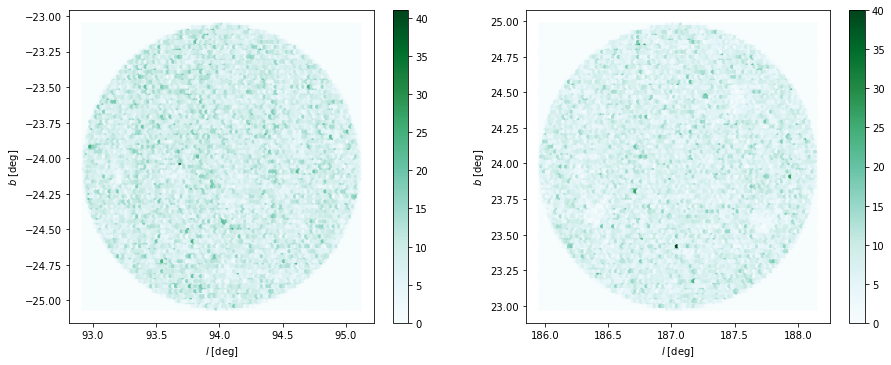

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5.75))

fieldA.plot(kind='hexbin', x='l', y='b', ax=ax[0])
fieldB.plot(kind='hexbin', x='l', y='b', ax=ax[1])

ax[0].set_xlabel(r"$l$ [deg]")
ax[0].set_ylabel(r"$b$ [deg]")
ax[1].set_xlabel(r"$l$ [deg]")
ax[1].set_ylabel(r"$b$ [deg]")

In [15]:
# Add a column for color
fieldA['g-r'] = fieldA.g - fieldA.r
fieldB['g-r'] = fieldB.g - fieldB.r

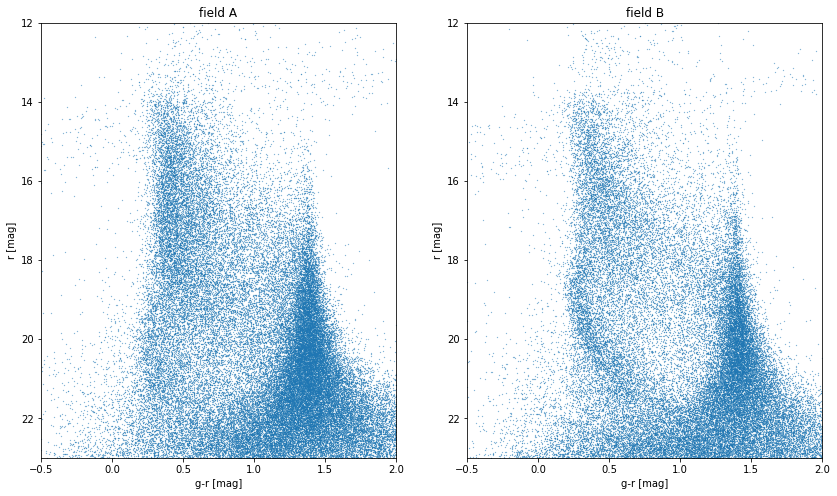

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))

fieldA.plot(kind='scatter', x='g-r', y='r', s=0.05, xlim=(-0.5, 2), ylim=(23, 12), ax=ax[0])
fieldB.plot(kind='scatter', x='g-r', y='r', s=0.05, xlim=(-0.5, 2), ylim=(23, 12), ax=ax[1])

ax[0].set_xlabel("g-r [mag]")
ax[0].set_ylabel("r [mag]")
ax[0].set_title('field A')

ax[1].set_xlabel("g-r [mag]")
ax[1].set_ylabel("r [mag]")
ax[1].set_title('field B')

There's a main-sequence-like feature in the plot to the right, bounded by $0.2 < g-r < 0.6$, $18 < g < 22$ rectangle, that isn't visible in the plot on the right. This is the "Monoceros Stream" (also sometimes known as the "Monoceros Ring"), discovered by Newberg et al. in 2002.